In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/02.모비젠/001.분석_저소득(2107_국토부)/03.분석진행/3. 소스 및 데이터 정리 /#5 노인여가복지시설 대중교통 접근성 점수/3. (Excel 변환파일) 복지시설별_대중교통_수.csv", encoding='cp949')

In [ ]:
df.head()

,OBJECTID,id,fac_type,fac_nam,fac_area,sequence,addr,x,y,읍면동,시군구,정류소명,정류소 표준ID,정류소 거리,정류소 개수,역사명,역번호,역 거리,역 개수,총 대중교통 수
0,3761,1,경로당,청 운,74.80,3761,종로구 필운대로 86 1층(신교동),126.967416,37.583506,서울특별시 종로구 신교동,서울특별시 종로구,0,0,0,0,0,0,0,0,0
1,5246,1486,경로당,은평뉴타운 폭포동4단지 제4,136.74,5246,연서로44길 55(진관동),126.936494,37.627653,서울특별시 은평구 진관동,서울특별시 은평구,0,0,0,0,0,0,0,0,0
2,7087,3327,경로당,리센츠,317.82,7087,올림픽로 135,127.089890,37.516734,서울특별시 송파구 잠실동,서울특별시 송파구,0,0,0,0,0,0,0,0,0
3,5264,1504,경로당,은평뉴타운폭포동4단지2은빛,128.10,5264,연서로44길 7 412동 앞(진관동),126.935569,37.628276,서울특별시 은평구 진관동,서울특별시 은평구,폭포동,111000102,0.483096726,1,0,0,0,0,1
4,5913,2153,경로당,상사,66.59,5913,개화길 52,126.801565,37.586786,서울특별시 강서구 개화동,서울특별시 강서구,개화동상사마을종점,115000300,0.21411262,1,0,0,0,0,1


In [ ]:
df_drop = df.drop(['fac_area','정류소명', '정류소 표준ID','정류소 거리','정류소 개수', '역사명','역번호',	'역 거리',	'역 개수'], axis=1)

In [ ]:
df_drop.head()

,OBJECTID,id,fac_type,fac_nam,sequence,addr,x,y,읍면동,시군구,총 대중교통 수
0,3761,1,경로당,청 운,3761,종로구 필운대로 86 1층(신교동),126.967416,37.583506,서울특별시 종로구 신교동,서울특별시 종로구,0
1,5246,1486,경로당,은평뉴타운 폭포동4단지 제4,5246,연서로44길 55(진관동),126.936494,37.627653,서울특별시 은평구 진관동,서울특별시 은평구,0
2,7087,3327,경로당,리센츠,7087,올림픽로 135,127.089890,37.516734,서울특별시 송파구 잠실동,서울특별시 송파구,0
3,5264,1504,경로당,은평뉴타운폭포동4단지2은빛,5264,연서로44길 7 412동 앞(진관동),126.935569,37.628276,서울특별시 은평구 진관동,서울특별시 은평구,1
4,5913,2153,경로당,상사,5913,개화길 52,126.801565,37.586786,서울특별시 강서구 개화동,서울특별시 강서구,1


In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  3910 non-null   int64  
 1   id        3910 non-null   int64  
 2   fac_type  3910 non-null   object 
 3   fac_nam   3910 non-null   object 
 4   sequence  3910 non-null   int64  
 5   addr      3910 non-null   object 
 6   x         3910 non-null   float64
 7   y         3910 non-null   float64
 8   읍면동       3910 non-null   object 
 9   시군구       3910 non-null   object 
 10  총 대중교통 수  3910 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 336.1+ KB


# 10개의 구간으로 나누기 

In [ ]:
df_drop_sort = df_drop.sort_values(by = '총 대중교통 수')

In [ ]:
df_drop_sort

,OBJECTID,id,fac_type,fac_nam,sequence,addr,x,y,읍면동,시군구,총 대중교통 수
0,3761,1,경로당,청 운,3761,종로구 필운대로 86 1층(신교동),126.967416,37.583506,서울특별시 종로구 신교동,서울특별시 종로구,0
1,5246,1486,경로당,은평뉴타운 폭포동4단지 제4,5246,연서로44길 55(진관동),126.936494,37.627653,서울특별시 은평구 진관동,서울특별시 은평구,0
2,7087,3327,경로당,리센츠,7087,올림픽로 135,127.089890,37.516734,서울특별시 송파구 잠실동,서울특별시 송파구,0
3,5264,1504,경로당,은평뉴타운폭포동4단지2은빛,5264,연서로44길 7 412동 앞(진관동),126.935569,37.628276,서울특별시 은평구 진관동,서울특별시 은평구,1
4,5913,2153,경로당,상사,5913,개화길 52,126.801565,37.586786,서울특별시 강서구 개화동,서울특별시 강서구,1
...,...,...,...,...,...,...,...,...,...,...,...
3905,4037,277,경로당,e편한세상금호파크힐스,4037,"서울시 성동구 금호로 140(금호1가동, e편한세상금호파크힐스아파트)",127.021928,37.553715,서울특별시 성동구 금호동1가,서울특별시 성동구,61
3906,4017,257,경로당,행당한진(아)제1,4017,"서울시 성동구 행당로 82(행당2동, 행당한진아파트)",127.029606,37.555126,서울특별시 성동구 행당동,서울특별시 성동구,62
3907,4018,258,경로당,행당한진(아)제2,4018,"서울시 성동구 행당로 82(행당2동, 행당한진아파트)",127.029606,37.555126,서울특별시 성동구 행당동,서울특별시 성동구,62
3908,7263,3503,노인교실,소망대학,7263,성동구 행당2동 346,127.029208,37.555879,서울특별시 성동구 행당동,서울특별시 성동구,63


(array([ 107.,  453., 1146., 1014.,  664.,  310.,  127.,   57.,   19.,
          13.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <a list of 10 Patch objects>)

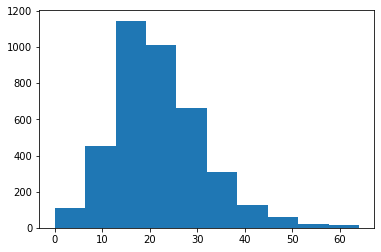

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_drop['총 대중교통 수'], bins=10)

In [ ]:
# 10개 각 구간에 해당하는 복지시설 수 
bins = [ 107,  453, 1146, 1014,  664,  310,  127,   57,  19, 13]

In [ ]:
# 구간별 가장 큰 값 출력 
sum = 0
for i in bins:
  sum += i
  print(df_drop_sort.loc[sum-1, '총 대중교통 수'])

6
12
19
25
31
38
44
51
57
64


In [ ]:
# 가장 큰 값을 기준으로 bin 생성 
bins_new = [0, 6, 12,19,25,31,38,44,51,57,64]

In [ ]:
len(bins_new)

11

In [ ]:
 # bin 라벨 생성 
 bins_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
len(bins_label)

10

In [ ]:
# 접근성 점수 열 생성 
df_drop_sort['level'] = ''

In [ ]:
# bins_new 값을 기준으로 bins_label 에 있는 라벨 값 라벨링 
df_drop_sort['level'] = pd.cut(df_drop_sort["총 대중교통 수"], bins_new, labels=bins_label[:])

In [ ]:
df_drop_sort

,OBJECTID,id,fac_type,fac_nam,sequence,addr,x,y,읍면동,시군구,총 대중교통 수,level
0,3761,1,경로당,청 운,3761,종로구 필운대로 86 1층(신교동),126.967416,37.583506,서울특별시 종로구 신교동,서울특별시 종로구,0,NaN
1,5246,1486,경로당,은평뉴타운 폭포동4단지 제4,5246,연서로44길 55(진관동),126.936494,37.627653,서울특별시 은평구 진관동,서울특별시 은평구,0,NaN
2,7087,3327,경로당,리센츠,7087,올림픽로 135,127.089890,37.516734,서울특별시 송파구 잠실동,서울특별시 송파구,0,NaN
3,5264,1504,경로당,은평뉴타운폭포동4단지2은빛,5264,연서로44길 7 412동 앞(진관동),126.935569,37.628276,서울특별시 은평구 진관동,서울특별시 은평구,1,1
4,5913,2153,경로당,상사,5913,개화길 52,126.801565,37.586786,서울특별시 강서구 개화동,서울특별시 강서구,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,4037,277,경로당,e편한세상금호파크힐스,4037,"서울시 성동구 금호로 140(금호1가동, e편한세상금호파크힐스아파트)",127.021928,37.553715,서울특별시 성동구 금호동1가,서울특별시 성동구,61,10
3906,4017,257,경로당,행당한진(아)제1,4017,"서울시 성동구 행당로 82(행당2동, 행당한진아파트)",127.029606,37.555126,서울특별시 성동구 행당동,서울특별시 성동구,62,10
3907,4018,258,경로당,행당한진(아)제2,4018,"서울시 성동구 행당로 82(행당2동, 행당한진아파트)",127.029606,37.555126,서울특별시 성동구 행당동,서울특별시 성동구,62,10
3908,7263,3503,노인교실,소망대학,7263,성동구 행당2동 346,127.029208,37.555879,서울특별시 성동구 행당동,서울특별시 성동구,63,10


In [ ]:
df_drop_sort.to_csv("4. (Python 변환파일) 복지시설별_접근성_점수_부여.csv", index=False)

(array([ 107.,  453., 1146., 1014.,  664.,  310.,  127.,   57.,   19.,
          13.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ]),
 <a list of 10 Patch objects>)

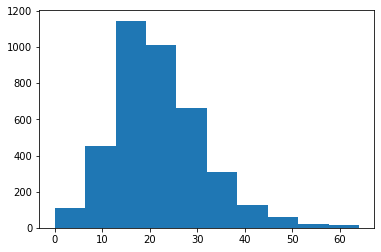

In [ ]:
plt.hist(df['총 대중교통 수'], bins=10)